# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
from tasks.takeoff import Task
from agents.policy_search import PolicySearch_Agent

# Modify the values below to give the quadcopter a different starting position.
runtime = 5000.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = PolicySearch_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    state = agent.reset_episode()
    total_reward = 0
    while True:
        rotor_speeds = agent.act(state)
        next_state, reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        total_reward += reward
        state = next_state
        if done:
            print("Total episode reward : {}".format(total_reward))
            total_reward = 0
            break

Setting default init pose
Total episode reward : 1299.7882029047717


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

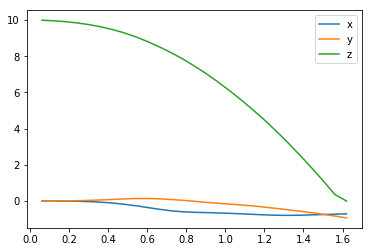

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

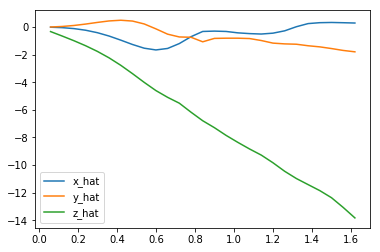

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

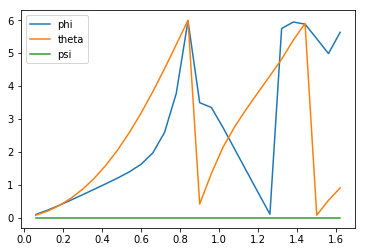

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

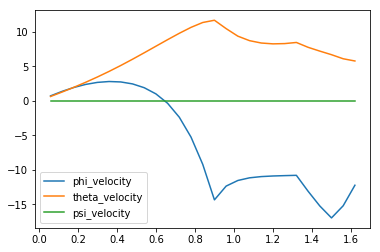

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

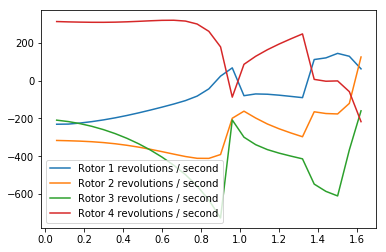

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-0.7104203  -0.93564238  0.          5.63174253  0.91042215  0.        ]
[  0.29667192  -1.79185399 -13.83486902]
[-12.22519466   5.79243424   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from tasks.takeoff import Task

num_episodes = 500
target_pos = np.array([0., 0., 100.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =  10.181 (best =  13.705), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

### DDPG Actor Critic Agent trained on TakeOff Task 

In [11]:
import sys, csv
import pandas as pd
import numpy as np
from agents.agent import DDPG
from tasks.takeoff import Task  # my custom takeoff task

# number of episodes to train
num_episodes = 2000

target_pos = np.array([0., 0., 100.])     # copter's target position in Sample_Task takeoff
task = Task(target_pos=target_pos)
agent = DDPG(task) 
low_score = 10000
best_score = -10000
best_x = 0
best_y = 0
best_z = 0
data = {}

scores = []
mean_scores = []
best_scores = []
reward_labels = ['episode', 'reward']
episode_results = {x : [] for x in reward_labels}

# Run the simulation for each episode.
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode()    # Initalize the sequence by starting a new episode.
    score = 0
    while True:
        action = agent.act(state)    # 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward              # update the score with the reward 
        
        if score > best_score:
            best_x = task.sim.pose[0]
            best_y = task.sim.pose[1]
            best_z = task.sim.pose[2]
            
        best_score = max(score, best_score)
        low_score =  min(low_score , score) 
        
        data[i_episode] = {'\rEpisode': i_episode, 'Reward':score,'Action':action,'Best_Score':best_score,
                            'Position_x':task.sim.pose[0],'Position_y':task.sim.pose[1],'Position_z':task.sim.pose[2]}
        if done:
            scores.append(score)                          #append the score for the performance results graph
            mean_scores.append(sum(scores)/len(scores))   #append the means for the performance results graph
            best_scores.append(best_score)                #append the best for the performance results graph
            # print("\n")
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), last_position = ({:5.1f},{:5.1f},{:5.1f}), best_position = ({:5.1f},{:5.1f},{:5.1f})".format(
                i_episode, score, best_score, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2], best_x, best_y, best_z), end="")
            
            # print("\n")
            # print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f} , lowest = {:7.3f})".format(
            #    i_episode, score, best_score, low_score), end="")
            break
            
    episode_results['episode'].append(i_episode)
    episode_results['reward'].append(score)
    sys.stdout.flush()

Using TensorFlow backend.


Episode = 2000, score = 347.230 (best = 3540.732), last_position = ( -4.9,  7.6,  0.0), best_position = ( 10.7,-72.5,114.4)))

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

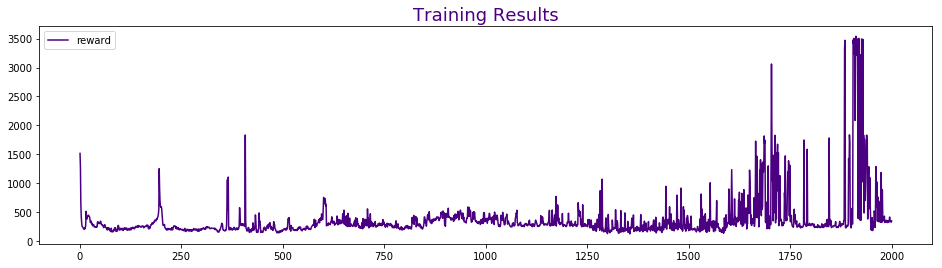

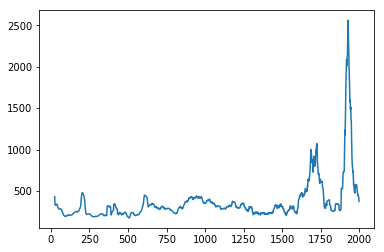

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,4))
plt.plot(episode_results['episode'], episode_results['reward'], label='reward', color='indigo')
plt.title('Training Results', color='indigo', fontsize=18)
plt.legend()
_ = plt.ylim()

df = pd.DataFrame(episode_results['reward'])
p1 = df.rolling(window=25).mean().plot(legend=False)

## Performance Demonstration
Lets now see how well the agent actually performs in reference to the above reward graph. For this, we will let the agent perform for one episode in the environment without learning anything new.

In [13]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.takeoff import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5000.                                  # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()
total_reward = 0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    total_reward += reward
    state = next_state
    if done:
        print("Total episode reward : {}".format(total_reward))
        total_reward = 0
        break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Setting default init pose
Total episode reward : 1658.767040668804


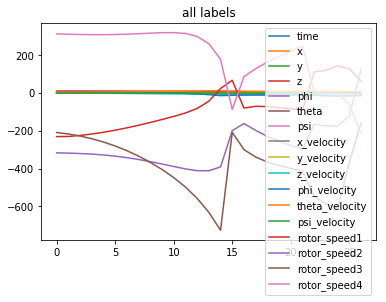

In [14]:
df_stats = pd.read_csv('data.txt')
df_stats.plot(title = "all labels")

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

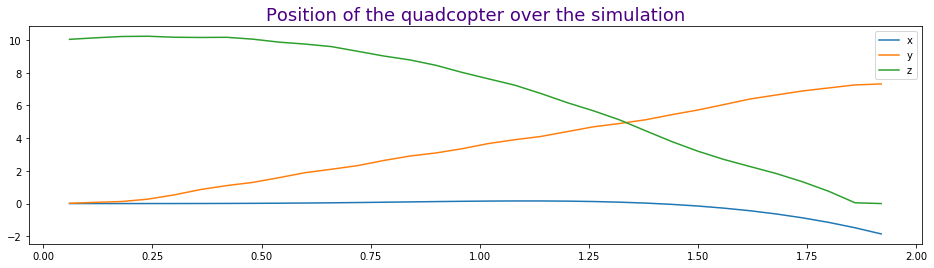

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,4))
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.title('Position of the quadcopter over the simulation', color='indigo', fontsize=18)
plt.legend()
_ = plt.ylim()

Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [16]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.85606781  7.31517994  0.          4.40523845  0.31044212  0.        ]
[ -6.72916944  -0.2181261  -14.71964448]
[-12.06400639   0.06816851   0.        ]


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
My task is specified as takeoff.py which is a simple task where the goal is to lift off the ground and reach a target height of 100m.
My first attempt after coding was that no takeoff was occurring using the initially provided reward function:  # original provided reward function in the get_reward() function.
> reward = 1-(0.3*(abs(self.sim.pose[:3] - self.target_pos))).sum()

This attempt was by using the signed difference between sim.pose & target.pose which as expected was leading to very poor score and almost no learning as the variance of the reward was very high and unbounded.
With some research, I found this article by Anne Bonner that suggests the use of the tanh function in the reward function.  https://towardsdatascience.com/how-to-train-your-quadcopter-adventures-in-machine-learning-algorithms-e6ee5033fd61
So for my next attempt, I changed to using the non linear function 'tanh' which bounded the reward to range [-1,1] . For this to work, some scaling was done to make values meaningful for tanh function.  With this function, the drone receives a reward between -1 and 1 at each step of the each episode according to the difference between its current position and target position for x, y, and z dimensions. 
>Initially the tanh reward function used was:
> np.tanh(1 - 0.3*(abs(self.sim.pose[:3] - self.target_pos)).sum())

I discovered that lowering the "0.3" constant gave much better results. After much trial and error, making the 0.3 smaller and smaller and rerunning 500 episodes each, I decided to use which will scale the current distance self.sim.pose[:3] to the agent's target position self.target_pos between -1 and 1, like this:
> reward= np.tanh(1- 0.0002*(abs(self.sim.pose[:3] - self.target_pos)).sum())
with a graphical representation like this:

![Alt Text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
Source: http://mathworld.wolfram.com/images/interactive/TanhReal.gif

During this initial testing, I had set the neural network to large dense state and action inputs, such as 400, 300, 300 with the default hyperparameters, and achieved improved score results after 200 episodes with the score/reward reaching between 500 and 593.   
I ran numerous runs of 500 episodes, varying the reward (fx) in takeoff.py and observing like this, looking to see which resulted in a higher best score: >
   - .01   score = 158.447, best 507.618
   - .002  score = 584.685, best 585.555
   - .005  score = 584.685, best 585.555
   - .0015  score =312.4,   best 591.865
   - .0005  score = 226.946, best 592.913

The drone however was still not achieving liftoff to the desired 100, so I looked at making improvements to the step function in my takeoff.py.  
I found that the reward function has to be coded as such to help the agent learn. Designing the reward function is one of the most important area for the agent to learn well and the penalties and reward signals have to be tailored to achieving goal and guide the quadcopter along the learning process.  A training video by Ross Story, Data Scientist at Bonsai, provides a good talk about writing great reward functions in reinforcement learning at https://www.youtube.com/watch?v=0R3PnJEisqk&list=PLAktfMEMCsOY9HUZKIuGI6yqefGBuszAV&index=4
In this article, it is suggested that combining positional aspects and velocity could be useful  https://medium.com/@BonsaiAI/deep-reinforcement-learning-models-tips-tricks-for-writing-reward-functions-a84fe525e8e0
Using these ideas, I modified the step function to reward +5 if when the z pose was above 10, then additional 10 within 50 meters of the target, and then additional 5 whenever the quadcopter was within + or – 5 meters of the 100meter z pose target, like this:
            # approach to target
            if self.sim.pose[2] >= 10:
                reward += 5                
            # good approach to target
            if self.sim.pose[2] >= (self.target_pos[2]-50):
                reward += 10
            # when within +/- 5 of target pose  (close to target)
            if (self.sim.pose[2] >= self.target_pos[2]-5) and (self.sim.pose[2] <= self.target_pos[2] + 5):
                   reward += 5
            if done :
                reward += 10

Improvements that may be useful but I did not try include: 
   <li>Using a non-linear function for reward such as distance$^2$ to the target</li>
   or    <li>A way to give rewards as the "fuel" was running (end of episoid is near</li>
   
This showed improvement after much tweaking, because I believe the copter was flying in circles during my trial and errors.  Then I started lowering the neural network parameters finally ending up with state and action inputs, such as 40, 30, 30, 30 with the default hyperparameters.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:<br>
 
 * Because I have so little experience with this type of project, when setting it up I initially relied closely to the project suggestions and sample code.  The learning algorithm that I used is the Deep Deterministic Policy Gradients (DDPG) because it was suggested for the project and it worked well. Another reason to use the DDPG algorithm is that the Q-learning agent does not have the ability to estimate value for unseen states. In order to deal with this problem, the Deep Q-Learning Neural Network eliminates the two-dimensional array by introducing a Neural Network. Each Deep Q Network leverages a Neural Network to estimate the Q-value function. Training on the network will be based on the Q-learning update equation, where the loss function for the network is defined as the Squared Error between target Q-value and the Q-value output from the network. The input for the network is the current value of the state, or action, or both, while the output is the corresponding Q-value for each of the actions or states. In this implementation I will use a dual set of neural networks, one for the actor and one for the critic. The actor will be used to tune the parameter theta for the policy function, in other words, provide the best action for a specific state. The critic will be used for evaluating the policy function estimated by the actor according to the temporal difference (TD) error. For the DDPG, a replay buffer and a target network will be employed. This paper by Lillicrap, is a good reference: https://arxiv.org/pdf/1509.02971.pdf


 * For hyperparameters, initially, I left all the hyperparameters as they were. The results were that the agent didn't learn well enough.  The final choice of the hyperparameters that were used are : 

    
    - Learning rate for the actor = 0.0001
    - Learning rate for the critic = 0.001
    - mu = 0, theta = 0.15, sigma = 0.3
    - Tau:  (soft target update rate): = .001  This value was suggested in the paper "Continuous Control with Deep Reinforcement Learning"
    - Gamma: = 0.99,   I tried a value of .6, but there didn't seem to be alot of improvement in score
    - Noise: I tried a linear decrease of the noise every episode, but keeping it as it was before made better results
    - Replay Buffer size / batch size: 100000 & 64 

* For the neural network architecture I used Deep Deterministic Policy Gradients (DDPG) for the task.  DDPG is an algorigthm well suited for continuous action space reinforcement learning. For the Actor and Critic uses somewhat different architectures, because the actor only takes states as inputs:

 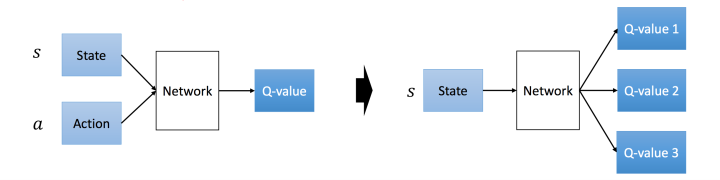
 
reference: https://towardsdatascience.com/introduction-to-various-reinforcement-learning-algorithms-i-q-learning-sarsa-dqn-ddpg-72a5e0cb6287

    The Neural Network Architecture parameters that I used are: 
    - Actor :
    
        - Dense(units=40) + BatchNorm + L2 Regularisation + ReLu Activation
        - Dense(units=30) + BatchNorm + L2 Regularisation + ReLu Activation
        - Dense(units=30) + BatchNorm + L2 Regularisation + ReLu Activation
        - Dense( RandomUniform Weight initialisation ) + Sigmoid Activation
    
        - The optimizer used is the Adam optimizer, set with a learning rate of 0.0001 which has been suggested by the paper
        "Continuous Control with Deep Reinforcement Learning"

      
     * Critic model is a little different - mainly because this is the model to calculate Q values dependent on states AND
       actions whereas the Actor only takes states as inputs as shown in the diagram above.  The architecture looks like the following (remember: we have
       actions and states as input):
    
    - Crtic :
        - Same as actor for the state inputs as actor
        
        - For the Input: actions: 
        - Dense(units=40) + BatchNorm + L2 Regularisation + ReLu Activation
        - Dense(units=30) + BatchNorm + L2 Regularisation + ReLu Activation
        - Dense(units=30) + BatchNorm + L2 Regularisation + ReLu Activation
        
        - For the Input actions:
        - Dense(units=30) + BatchNorm + L2 Regularisation + ReLu Activation

        - Combining : Add with ReLu Activation   
        - Dense( RandomUniform Weight initialisation ) + Sigmoid Activation
    
        - The optimizer used is the Adam optimizer, set with a learning rate of 0.001 which has been suggested by the paper 
            "Continuous Control with Deep Reinforcement Learning"
        - Like the Agent's network, the Critic's network also used Dropout layers and batch normalization 
            after each Dense layer.
            
          
        I tested dropout layers (of 50% and 30% dropout) and batch normalization which should reduce overfitting, but my
        scores were getting lower, so I removed dropout.
        


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- I would consider it relatively simple control task as can be seen , initially the agent is trying all possibilities for a high reward & hence the instability & as later it has got some experience in the env, it gradually become consistent in taking actions with higher rewards.

- The drone seemed to receive periodic large increases in rewards, which appeared to be "aha moments" rather than a gradual learning curve then gradually matured it to a fairly performing agent.  
 ** <p> For the final performance, I got the best performance together with the smaller units on the NN, 40,30,30, and combined with the targeting on the step function of the reward in the takeoff.py, but found I had to let it run for 2000 episodes and then received quite the surprise of good rewards after 1500 episodes and it looks like it generates a consistent gradual learning curve.</p>

Some of the attempts to improve the learning included:
<ul>
   <li>The use of sigmoid vs tanh activation functions</li>
   <li>Increasing actor learning rate by factor 10</li>
   <li>Increasing critic learning rate by factor 10</li>
   <li>Increasing number of episodes - 500, 1000, 1500, 2000</li>
   <li>Increasing penalties by factor 10</li>
   <li>Decreasing penalties by factor 10</li>
   <li>Increased exploration noise volatility $\sigma$ from 0.2 to 0.3</li>
   <li>Clamping reward to $[-1,1]$ using tanh</li>
   <li>Simplifying the reward function</li>
</ul>

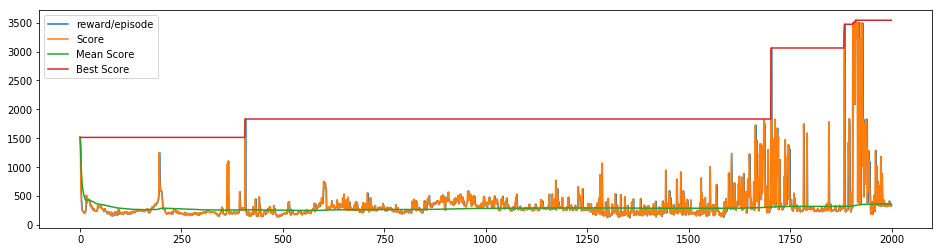

In [17]:
print
plt.figure(figsize=(16,4))
plt.plot(episode_results['episode'], episode_results['reward'], label='reward/episode')
plt.plot(range(0, len(scores)), scores, label = "Score")
plt.plot(range(0, len(scores)), mean_scores, label = "Mean Score")
plt.plot(range(0, len(scores)), best_scores, label = "Best Score")
plt.legend()
_ = plt.ylim()

In [18]:
# Final Performance 
print("The Final Quadcopter agent Performance, Mean Reward averaged over the last 10 episodes: {}".format(np.sum(episode_results['reward'][-10:])/10))

The Final Quadcopter agent Performance, Mean Reward averaged over the last 10 episodes: 347.7617851000513


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
 Understanding how to implement the DDPG and Actor Critic algorithm was a challenge for me. I replayed to study the lecture videos numerous times, and worked to understand the examples. Reading articles on towardsdatascience was very helpful in providing understanding. This combined with the time to train the agent made this project the most challenging in the machine learning nanodegree.

After getting the code to work, I estimated I spent a lot of of the time tweaking the hyper-parameters, then stepwise changing the NN units, and then modifying the reward function by running the training again and again.  I persisted and landed on a set of hyper-parameters that produced the best results amongst all the training episodes. Finding the right combination seemed very elusive.

It was interesting to see the results when changing the reward function. The reward function is the key for a successful learning rate. After trying different methods to normalize and to incentify right behavior correctly, I noticed a drastic change in the learning curve of the agent. At first, it seemed random, but after applying different incentives, the performance increased in a satisfying manner.

What I used as an indicator of performance was the plot show how the quadcopter performed during the simulation. Changing the reward parameter affected the stability of the performance dramatically after 200 episodes in my early testing and then after 1250 episodes in my later testing.

It would have been helpful to have a deeper understanding of the DDPG algorithm prior to attempting this project.
Methods that could be done to help greatly improve the hyperparameter tuning and reward function design would be to use a quadcopter visualization script.  A python visualization method can be found at https://github.com/AtsushiSakai/PythonRobotics under Aerial Navigation https://github.com/AtsushiSakai/PythonRobotics/tree/master/AerialNavigation/drone_3d_trajectory_following